In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas, xgboost, numpy, textblob, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
tweets = pd.read_pickle('./proccessed_tweets.pkl')
tweets.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [9]:
def identity_tokenizer(text):
    return text

In [10]:
stemmed_count_vectorizer = CountVectorizer(tokenizer=identity_tokenizer, stop_words='english',
                                   lowercase=False, max_df=0.9, max_features=1000)

# Создаем the Bag-of-Words модель
stemmed_count_bag_of_words = stemmed_count_vectorizer.fit_transform(tweets['tweet_stemmed'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = stemmed_count_vectorizer.get_feature_names()
pd.DataFrame(stemmed_count_bag_of_words.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
lemmatized_count_vectorizer = CountVectorizer(tokenizer=identity_tokenizer, stop_words='english',
                                   lowercase=False, max_df=0.9, max_features=1000)

# Создаем the Bag-of-Words модель
lemmatized_count_bag_of_words = lemmatized_count_vectorizer.fit_transform(tweets['tweet_lemmatized'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = lemmatized_count_vectorizer.get_feature_names()
pd.DataFrame(lemmatized_count_bag_of_words.toarray(), columns = feature_names)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yes,yesterday,yo,yoga,york,young,youth,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
stemmed_tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english',
                                   lowercase=False, max_df=0.9, max_features=1000)

# Создаем the Bag-of-Words модель
stemmed_tfidf_bag_of_words = stemmed_tfidf_vectorizer.fit_transform(tweets['tweet_stemmed'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = stemmed_tfidf_vectorizer.get_feature_names()
pd.DataFrame(stemmed_tfidf_bag_of_words.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.403633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
lemmatized_tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english',
                                   lowercase=False, max_df=0.9, max_features=1000)

# Создаем the Bag-of-Words модель
lemmatized_tfidf_bag_of_words = lemmatized_tfidf_vectorizer.fit_transform(tweets['tweet_lemmatized'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = lemmatized_tfidf_vectorizer.get_feature_names()
pd.DataFrame(lemmatized_tfidf_bag_of_words.toarray(), columns = feature_names)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yes,yesterday,yo,yoga,york,young,youth,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
def train_model(classifier, feature_vector_train, label):
    classifier.fit(feature_vector_train, label)
    
    predictions_proba = classifier.predict_proba(feature_vector_train)
    predictions = (predictions_proba >= 0.3)[:,1].astype(int)
    
    
    return metrics.accuracy_score(predictions, label)

In [58]:
train_model(linear_model.LogisticRegression(), stemmed_count_bag_of_words[:31962], tweets[:31962]['label'])

0.9530692697578375

In [62]:
train_model(linear_model.LogisticRegression(), lemmatized_count_bag_of_words[:31962], tweets[:31962]['label'])

0.951880357925036

In [63]:
train_model(linear_model.LogisticRegression(), stemmed_tfidf_bag_of_words[:31962], tweets[:31962]['label'])

0.9527563982228897

In [64]:
train_model(linear_model.LogisticRegression(), lemmatized_tfidf_bag_of_words[:31962], tweets[:31962]['label'])

0.9510668919341718

В нашем случае существенного различия использование различных вариантов векторизации не дало.

In [70]:
stops = set(stopwords.words('english'))

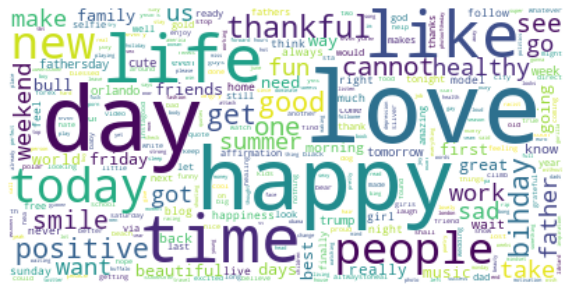

In [71]:
import collections

words = []
for line in tweets['tweet']: 
    line_words = line.split()
    words.extend([x for x in line_words if x not in stops])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

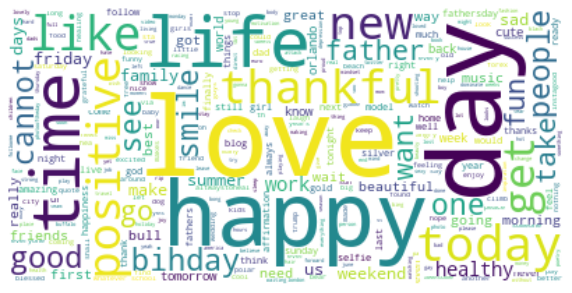

In [73]:
words = []
for line in tweets.loc[tweets['label'] == 0]['tweet']: 
    line_words = line.split()
    words.extend([x for x in line_words if x not in stops])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

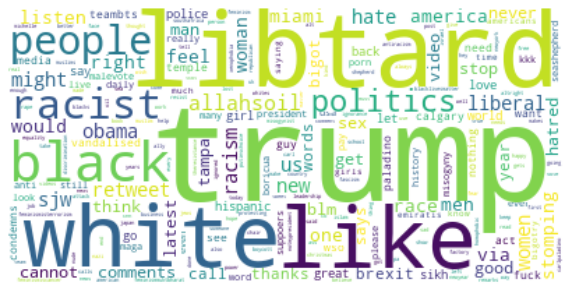

In [74]:
words = []
for line in tweets.loc[tweets['label'] == 1]['tweet']: 
    line_words = line.split()
    words.extend([x for x in line_words if x not in stops])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()